In [171]:
import tensorflow as tf

inputs = tf.random.normal([1, 10, 10, 7, 4])
print(inputs.shape)
conv = tf.keras.layers.Conv3D(32, (7, 7, 5), strides=1, padding='same')
outputs = conv(inputs)
print(outputs.shape)

(1, 10, 10, 7, 4)


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above. [Op:Conv3D]

[[0, 0, 0], [243, 248, 238], [254, 126, 125], [254, 95, 56], [142, 121, 56], [160, 212, 56], [219, 212, 56]]

uint8


Text(0.5, 1.0, 'channel')

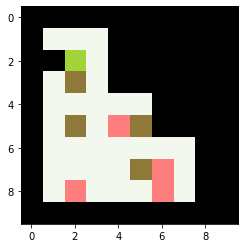

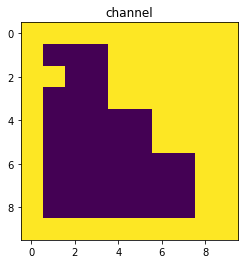

In [164]:
# RGB
wall = [0, 0, 0]
floor = [243, 248, 238]
box_target = [254, 126, 125]
box_on_target = [254, 95, 56]
box = [142, 121, 56]
player = [160, 212, 56]
player_on_target = [219, 212, 56]

surfaces = [wall, floor, box_target, box_on_target, box, player, player_on_target]
print(surfaces)
print()
# print(observation[0:5, 0:5, :])
# print()

grid = np.zeros((10, 10, 7), dtype=np.uint8)

plt.imshow(observation)
#print(np.all(observation[0:5, 0:5, :] == surfaces[1], axis=2).astype(np.uint8))
for si in range(len(surfaces)):
    grid[..., si] = np.all(observation == surfaces[si], axis=2).astype(np.uint8)
print(grid.dtype)
plt.figure()
plt.imshow(grid[..., 0]); plt.title('channel')

9
(10, 10, 3)
uint8
10 10 3
(10, 10, 3)
-0.1
False
{'action.name': 'push left', 'action.moved_player': True, 'action.moved_box': False}


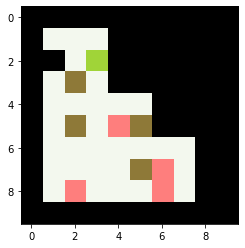

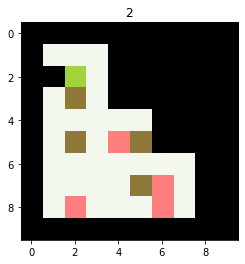

In [120]:
import gym
import gym_sokoban
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

#env = gym.make('Sokoban-v0')
env = gym.make('Boxoban-Train-v0')
n_actions = env.action_space.n
print(n_actions)

env.reset()

for _ in range(1000):
    #plt.imshow(env.render(mode='tiny_rgb_array'))
    frame = np.array(env.render(mode='tiny_rgb_array'))
    print(frame.shape)
    plt.imshow(frame)
    #display.clear_output(wait=True)
    #display.display(plt.gcf())
    observation, reward, done, info = env.step(env.action_space.sample(), observation_mode='tiny_rgb_array')
    plt.figure()
    plt.imshow(np.array(observation)); plt.title('2')
    print(observation.shape); print(reward); print(done); print(info)
    break

In [19]:
import gym
import gym_sokoban
import numpy as np
from PIL import Image
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('Sokoban-v0')
env.reset()
for _ in range(1000):
    env.render(mode='human')
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print(type(env.render(mode='human')))
    img = Image.fromarray(np.array(env.render(mode='human')), 'RGB')
    #plt.imshow(env.render(mode='human'))
    #display.clear_output(wait=True)
    display.display(img)

<class 'bool'>


IndexError: tuple index out of range

In [18]:
import gym
import gym_sokoban
import time
from PIL import Image
import numpy as np
import argparse
import os

parser = argparse.ArgumentParser(description='Run environment with random selected actions.')
parser.add_argument('--rounds', '-r', metavar='rounds', type=int,
                    help='number of rounds to play (default: 1)', default=1)
parser.add_argument('--steps', '-s', metavar='steps', type=int,
                    help='maximum number of steps to be played each round (default: 300)', default=300)
parser.add_argument('--env', '-e', metavar='env',
                    help='Environment to load (default: Sokoban-v0)', default='Sokoban-v0')
parser.add_argument('--save', action='store_true',
                    help='Save images of single steps')
parser.add_argument('--gifs', action='store_true',
                    help='Generate Gif files from images')
parser.add_argument('--render_mode', '-m', metavar='render_mode',
                    help='Render Mode (default: human)', default='human')

args = parser.parse_args()
env_name = args.env
n_rounds = args.rounds
n_steps = args.steps
save_images = args.save or args.gifs
generate_gifs = args.gifs
render_mode = args.render_mode
observation_mode = 'tiny_rgb_array' if 'tiny' in render_mode else 'rgb_array'
scale_image = 16

# Creating target directory if images are to be stored
if save_images and not os.path.exists('images'):
    try:
        os.makedirs('images')
    except OSError:
        print('Error: Creating images target directory. ')

ts = time.time()
env = gym.make(env_name)
ACTION_LOOKUP = env.unwrapped.get_action_lookup()
print("Created environment: {}".format(env_name))


def print_available_actions():
    """
    Prints all available actions nicely formatted..
    :return:
    """
    available_actions_list = []
    for i in range(len(ACTION_LOOKUP)):
        available_actions_list.append(
            'Key: {} - Action: {}'.format(i, ACTION_LOOKUP[i])
        )
    display_actions = '\n'.join(available_actions_list)
    print()
    print('Action out of Range!')
    print('Available Actions:\n{}'.format(display_actions))
    print()


for i_episode in range(n_rounds):
    print('Starting new game!')
    observation = env.reset()

    for t in range(n_steps):
        env.render(render_mode, scale=scale_image)

        action = input('Select action: ')
        try:
            action = int(action)

            if not action in range(len(ACTION_LOOKUP)):
                raise ValueError

        except ValueError:
            print_available_actions()
            continue

        observation, reward, done, info = env.step(action, observation_mode=observation_mode)
        print(ACTION_LOOKUP[action], reward, done, info)
        print(len(observation), len(observation[0]), len(observation[0][0]))
        if save_images:
            img = Image.fromarray(np.array(env.render(render_mode, scale=scale_image)), 'RGB')
            img.save(os.path.join('images', 'observation_{}_{}.png'.format(i_episode, t)))

        if done:
            print("Episode finished after {} timesteps".format(t+1))
            env.render(render_mode, scale=scale_image)
            break

    if generate_gifs:
        print('')
        import imageio

        with imageio.get_writer(os.path.join('images', 'round_{}.gif'.format(i_episode)), mode='I', fps=1) as writer:

                for t in range(n_steps):
                    try:

                        filename = os.path.join('images', 'observation_{}_{}.png'.format(i_episode, t))
                        image = imageio.imread(filename)
                        writer.append_data(image)

                    except:
                        pass

env.close()
time.sleep(10)

usage: ipykernel_launcher.py [-h] [--rounds rounds] [--steps steps]
                             [--env env] [--save] [--gifs]
                             [--render_mode render_mode]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-75bf61a2-fa83-40ef-93c0-b60696e3f71a.json


SystemExit: 2